In [6]:
import os, shutil
import matplotlib.pyplot as plt
path='/nas/dataset/users/minhyeok/recon'


In [5]:
a = sitk.ReadImage('/nas/dataset/users/minhyeok/recon/train/C050/Full Dose Images-84094/1-243.dcm')
b = sitk.GetArrayFromImage(a).astype('float32')
print(b.dtype)

float32


In [2]:
import torch
import glob
import SimpleITK as sitk
from PIL import Image
import numpy as np
class DAE_dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform = None):
        self.data_dir = data_dir
        self.transform = transform
        self.imgs_data       = glob.glob(self.data_dir + '/*/Full*/*.dcm')
        self.noisy_imgs_data = glob.glob(self.data_dir + '/*/Low*/*.dcm')
        
    
    def __getitem__(self, index):  
        # read images in grayscale, then invert them
        full = sitk.ReadImage(self.imgs_data[index])
        full_arr = sitk.GetArrayFromImage(full)
        full_arr = (full_arr - np.min(full_arr)) / (np.max(full_arr) - np.min(full_arr))
        full_arr = full_arr * 255.0
        img = Image.fromarray(np.uint8(full_arr[0]))

        low = sitk.ReadImage(self.noisy_imgs_data[index])
        low_arr = sitk.GetArrayFromImage(low)
        low_arr = (low_arr - np.min(low_arr)) / (np.max(low_arr) - np.min(low_arr))
        low_arr = low_arr * 255.0
        noisy_img = Image.fromarray(np.uint8(low_arr[0]))
    
        if self.transform is not None:            
            img = self.transform(img)             
            noisy_img = self.transform(noisy_img)  

        return img, noisy_img

    def __len__(self):
        return len(self.imgs_data)

import torchvision
import torchvision.transforms as transforms

transforms_train = transforms.Compose([
    torchvision.transforms.Resize(64),
    # transforms.RandomCrop(32, padding=4),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, ), (0.5, ))])

In [7]:
from utils import UNet_Energy_log, to_numpy, init_weights, Self_Energy_log, Custom_Dataset, SGLD
from torch.utils.data import DataLoader


tr = Custom_Dataset(path, transform=transforms_train)

dl = DataLoader(dataset=tr, batch_size=32, shuffle=True)

for a, b in enumerate(dl):
    print(a,b)


0 [tensor([[[[-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          ...,
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843]]],


        [[[-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          ...,
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843]]],


        [[[-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.

/nas/users/minhyeok/energy_based_model/code/utils.py:26: RuntimeWarning: invalid value encountered in true_divide
  full_arr = (full_arr - np.min(full_arr)) / (np.max(full_arr) - np.min(full_arr))
/nas/users/minhyeok/energy_based_model/code/utils.py:32: RuntimeWarning: invalid value encountered in true_divide
  low_arr = (low_arr - np.min(low_arr)) / (np.max(low_arr) - np.min(low_arr))


137 [tensor([[[[-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          ...,
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843]]],


        [[[-0.9765, -0.9765, -0.9608,  ..., -0.9843, -0.9765, -0.8902],
          [-0.9765, -0.9686, -0.9843,  ..., -0.9843, -0.9529, -0.9608],
          [-0.9922, -0.9843, -0.9843,  ..., -0.9686, -0.9843, -0.9922],
          ...,
          [-0.9686, -0.9608, -0.9765,  ..., -0.9451, -0.9529, -0.9451],
          [-0.9765, -0.9686, -0.9686,  ..., -0.9451, -0.9451, -0.9686],
          [-0.9608, -0.9765, -0.9765,  ..., -0.9529, -0.9294, -0.9451]]],


        [[[-0.9922, -0.9843, -0.9765,  ..., -0.9686, -0.9765, -0.9922],
          [-0.9686, -

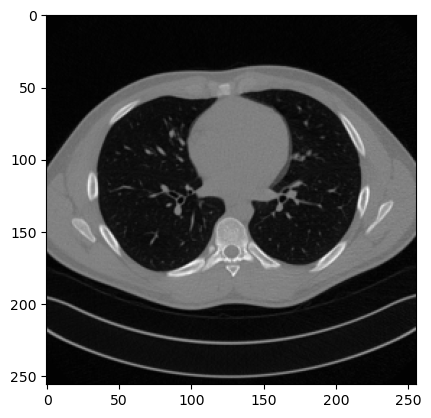

In [20]:
plt.imshow(a[0][0], 'gray')
plt.show()

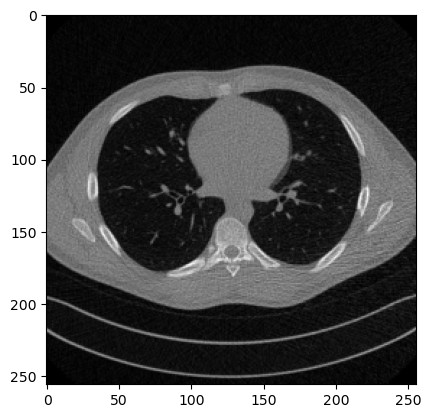

In [21]:
plt.imshow(b[0][0], 'gray')
plt.show()

In [1]:
import torch
import torchvision
import torch.optim as optim
import pytorch_lightning as pl
from torch.nn.parameter import Parameter
from torchmetrics import PeakSignalNoiseRatio
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import datetime
import csv
import os
import argparse
from typing import Tuple, Optional
import torch.nn as nn


class CondEnergyModel(nn.Module):
    def __init__(self: 'CondEnergyModel', in_channel: int = 2, 
                 dim_feature: int = 32, dim_output: int = 1, dim_latent: int = 0, 
                            activation: str='silu',
                            use_gp: bool = False, gp_weight: float = 0.0, 
                            use_reg: bool = False, reg_weight: float = 0.0, 
                            use_L2_reg: bool = False, L2_reg_weight: float = 0.0, 
                            scale_range: list = [-1, 1]) -> None:
        super(CondEnergyModel, self).__init__()

        self.in_channel    = in_channel
        self.dim_feature   = dim_feature
        self.dim_output    = dim_output
        self.dim_latent    = dim_latent
        self.use_gp        = use_gp
        self.gp_weight     = gp_weight
        self.use_reg       = use_reg
        self.reg_weight    = reg_weight
        self.use_L2_reg    = use_L2_reg
        self.L2_reg_weight = L2_reg_weight
        self.scale_range   = scale_range

        self.dim_latent_z  = dim_latent
        
        self.conv1 = nn.Conv2d(in_channels=in_channel, out_channels=dim_feature * 1, kernel_size=3, stride=2, padding=1, bias=True)
        self.conv2 = nn.Conv2d(in_channels=dim_feature * 1, out_channels=dim_feature * 2, kernel_size=3, stride=2, padding=1, bias=True)
        self.conv3 = nn.Conv2d(in_channels=dim_feature * 2, out_channels=dim_feature * 4, kernel_size=3, stride=2, padding=1, bias=True)
        self.conv4 = nn.Conv2d(in_channels=dim_feature * 4, out_channels=dim_feature * 8, kernel_size=3, stride=2, padding=1, bias=True)
        
        
        self.linear1 = nn.Linear(in_features=dim_latent, out_features=dim_feature * 1, bias=True)
        self.linear2 = nn.Linear(in_features=dim_latent, out_features=dim_feature * 2, bias=True)
        self.linear3 = nn.Linear(in_features=dim_latent, out_features=dim_feature * 4, bias=True)

        self.linear            = nn.Linear(in_features=dim_feature * 4 * 4 * 4 * 2+ dim_latent, out_features=dim_output, bias=True)
        if activation == 'silu':
            self.activation    = nn.SiLU()
        elif activation == 'leakyrelu':
            self.activation    = nn.LeakyReLU()
        self.flatten           = nn.Flatten()

    def forward(self: 'CondEnergyModel', a: torch.Tensor, b: torch.Tensor, z: Optional[torch.Tensor] = None) -> torch.Tensor:
        x = torch.cat([a, b], dim=1)
        x = self.conv1(x)
        
        if z is not None:
            z = self.linear1(z)
            z = z.unsqueeze(-1) 
            z = z.unsqueeze(-1) 
            x = self.activation(x + z)
            print('use_z')
        else: 
            x = self.activation(x)

        x = self.conv2(x)

        if z is not None:
            z = self.linear2(z)
            z = z.unsqueeze(-1) 
            z = z.unsqueeze(-1) 
            x = self.activation(x + z)
        else: 
            x = self.activation(x)
  
        x = self.conv3(x)
        
        if z is not None:
            z = self.linear3(z)
            z = z.unsqueeze(-1) 
            z = z.unsqueeze(-1) 
            x = self.activation(x + z)
        else: 
            x = self.activation(x)

        x = self.conv4(x)
        x = self.activation(x)
        
        # x = self.conv5(x)
        # x = self.activation(x)
        
        x = self.flatten(x)
        x = self.linear(x)
        print('model use')
        return x


    def compute_gradient_norm(self: 'CondEnergyModel', x_input: torch.Tensor, x_prediction: torch.Tensor) -> torch.Tensor:
        grad_output = torch.autograd.Variable(torch.ones_like(x_prediction), requires_grad=False)
        gradient    = torch.autograd.grad(outputs=x_prediction, 
                                          inputs=x_input, 
                                          grad_outputs=grad_output, 
                                          create_graph=True, 
                                          retain_graph=True, 
                                          only_inputs=True)[0]

        return torch.sum(gradient.pow(2).reshape(len(x_input), -1).sum(1))


    def compute_gradient(self: 'CondEnergyModel', input: torch.Tensor, prediction: torch.Tensor) -> torch.Tensor:
        gradient = torch.autograd.grad(outputs=prediction.sum(), inputs=input, create_graph=True, retain_graph=True)[0]
        
        return gradient


    def compute_gradient_penalty(self: 'CondEnergyModel', input: torch.Tensor, prediction: torch.Tensor) -> torch.Tensor:
        gradient        = self.compute_gradient(input, prediction)
        gradient        = gradient.view(input.shape[0], -1)
        gradient_norm   = torch.norm(gradient, p=2, dim=1)
        penalty         = torch.mean((gradient_norm - 1.0).pow(2))
        
        return penalty
    
    def compute_pos(self: 'CondEnergyModel', positive_input: torch.Tensor, positive_output: torch.Tensor, 
                                              negative_input: torch.Tensor, negative_output: torch.Tensor, 
                                              z_positive: Optional[torch.Tensor] = None, 
                                              z_negative: Optional[torch.Tensor] = None) -> torch.Tensor:
        # positive_output = positive_output.requires_grad_(True)
        positive        = self(positive_input, positive_output, z_positive)
        
        return positive

    def compute_loss(self: 'CondEnergyModel', positive_input: torch.Tensor, positive_output: torch.Tensor, 
                                              negative_input: torch.Tensor, negative_output: torch.Tensor, 
                                              z_positive: Optional[torch.Tensor] = None, 
                                              z_negative: Optional[torch.Tensor] = None) -> torch.Tensor:
        positive_output = positive_output.requires_grad_(True)
        positive        = self(positive_input, positive_output, z_positive) # model
        negative_output = negative_output.requires_grad_(True)
        negative        = self(negative_input, negative_output, z_negative) # model
        loss            = positive.sum() - negative.sum()

        if self.use_L2_reg:
            loss += self.L2_reg_weight * (positive**2 + negative**2).sum()

        if self.use_reg:
            positive_grad_norm = self.compute_gradient_norm(positive_output, positive)
            negative_grad_norm = self.compute_gradient_norm(negative_output, negative)
            loss += self.reg_weight * (positive_grad_norm + negative_grad_norm)

        if self.use_gp:
            '''
            loss += self.gp_weight * self.compute_gradient_penalty(positive_input, positive_output, 
                                                                   negative_input, negative_output, 
                                                                   z_positive)
            '''
            size_batch  = positive_output.shape[0] 
            alpha       = torch.rand(size_batch, 1, 1, 1)
            alpha       = alpha.expand_as(positive_output).to(positive_output.device)
            interpolate_input   = alpha * positive_input.data + (1 - alpha) * negative_input.data
            interpolate_output  = alpha * positive_output.data + (1 - alpha) * negative_output.data
            interpolate_input   = torch.nn.Parameter(interpolate_input, requires_grad=True)
            interpolate_output  = torch.nn.Parameter(interpolate_output, requires_grad=True)
            interpolate_pred    = self(interpolate_input, interpolate_output) # model
            gradient_penalty    = self.compute_gradient_penalty(interpolate_output, interpolate_pred)
            loss += gradient_penalty

        return loss
  
    def compute_loss_inference(self: 'CondEnergyModel', negative_input: torch.Tensor, negative_output: torch.Tensor, z_negative: Optional[torch.Tensor] = None):
        negative = self(negative_input, negative_output, z_negative)
        loss     = -negative.sum()

        return loss

    def update_prediction_lang(self: 'CondEnergyModel', x: torch.Tensor, prediction: torch.Tensor, 
                                                            number_step_langevin: int, lr_langevin: float, 
                                                            regular_data: float, add_noise: bool, 
                                                            noise_decay: float = 1.0, z_negative: Optional[torch.Tensor] = None) -> torch.Tensor:
        update = nn.Parameter(prediction, requires_grad=True)
        for _ in range(number_step_langevin):
            loss = self.compute_loss_inference(x, update, z_negative) # model 사용 X 10 회
            loss.backward()
            
            update.data = update.data - 0.5 * lr_langevin * update.grad
            update.data = torch.clamp(update.data, *self.scale_range)
            update.grad.detach_()
            update.grad.zero_()        
        return update
    def update_prediction_langevin(self: 'CondEnergyModel', x: torch.Tensor, prediction: torch.Tensor, 
                                                            number_step_langevin: int, lr_langevin: float, 
                                                            regular_data: float, add_noise: bool, 
                                                            noise_decay: float = 1.0, z_negative: Optional[torch.Tensor] = None) -> torch.Tensor:
        update = nn.Parameter(prediction, requires_grad=True) # model 사용
        for _ in range(number_step_langevin):
            loss = self.compute_loss_inference(x, update, z_negative) # model 사용 X 10 회
            loss.backward()
            
            update.data = update.data - 0.5 * lr_langevin * update.grad

            if regular_data > 0.0:
                update.data = update.data + 0.5 * regular_data * update.data

            if add_noise == True:
                update.data = update.data + 0.5 * noise_decay * np.sqrt(lr_langevin) * torch.randn_like(update)
            
            # activation
            update.data = torch.clamp(update.data, *self.scale_range)
            update.grad.detach_()
            update.grad.zero_()

        return update




In [2]:
energy = CondEnergyModel(1 * 2, 64, 1, scale_range=[-1,1], use_reg=False, 
                                                                  reg_weight=False, 
                                                                  use_L2_reg=False,
                                                                  L2_reg_weight=False)

/home/minhyeok/anaconda3/lib/python3.9/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [6]:
energy.compute_loss_inference(torch.ones(10,1,64,64), torch.zeros(10,1,64,64))

model use


tensor(0.1438, grad_fn=<NegBackward0>)

In [5]:
energy.update_prediction_langevin(torch.zeros(10,1,64,64), torch.ones(10,1,64,64), 1, 0.01, False, False, False)

model use


Parameter containing:
tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]]],


        [[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]]],


        [[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.000

In [19]:
energy.compute_pos(torch.ones(10,1,64,64), torch.zeros(10,1,64,64), torch.ones(10,1,64,64), torch.zeros(10,1,64,64))

model use


tensor([[0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040]], grad_fn=<AddmmBackward0>)